


#  Scikit-Learn with the Wine Quality Dataset

##Sagar Bhandari
## Date: October 09 , 2025

In [10]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#some essesntial libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier



In [12]:
#loading data

wine_df=pd.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv',)

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
wine_df.shape

(4898, 12)

In [14]:
wine_df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [15]:
#split data
target = 'quality'
predictors = wine_df.columns.drop(target)

train_data, test_data, train_sln, test_sln = train_test_split(wine_df[predictors], wine_df[target], test_size=0.2, random_state=41)

Quick cross check if we got split correctly.

In [16]:
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)
print('train_sln shape:', train_sln.shape)
print('test_sln shape:', test_sln.shape)

train_data.head()

train_data shape: (3918, 11)
test_data shape: (980, 11)
train_sln shape: (3918,)
test_sln shape: (980,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4595,7.1,0.39,0.30,9.9,0.037,29.0,124.0,0.99414,3.07,0.42,10.9
1808,7.5,0.33,0.39,12.4,0.065,29.0,119.0,0.99740,3.16,0.39,9.4
1188,7.1,0.21,0.30,1.4,0.037,45.0,143.0,0.99320,3.13,0.33,9.9
1388,7.3,0.18,0.29,1.2,0.044,12.0,143.0,0.99180,3.20,0.48,11.3
1836,7.0,0.19,0.23,5.7,0.123,27.0,104.0,0.99540,3.04,0.54,9.4


Now, our data is cleaned and splitted perfeclty as we wanted.
We can proceed to write our atleast 6 models and compute accuracy scores.

In [17]:
# 1. UNWEIGHTED kNN , with small K

k=4

knn_small = KNeighborsRegressor(n_neighbors=k, weights='uniform') # its already uniform by default ,,


#doc: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


knn_small.fit(train_data, train_sln)

pred_knn_small = knn_small.predict(test_data)

#Compute performance
mse = mean_squared_error(test_sln, pred_knn_small)
mae = mean_absolute_error(test_sln, pred_knn_small)
r2 = r2_score(test_sln, pred_knn_small)



print("UNWEIGHTED kNN  with small K=4")
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)


UNWEIGHTED kNN  with small K=4
MSE: 0.6369260204081633
MAE: 0.6038265306122449
R2: 0.19333925434779187


In [18]:
# 2. UNWEIGHTED kNN , with Large  K

k=14

knn_large = KNeighborsRegressor(n_neighbors=k, weights='uniform')
knn_large.fit(train_data, train_sln)

pred_knn_large = knn_large.predict(test_data)

#Compute performance
mse = mean_squared_error(test_sln, pred_knn_large)
mae = mean_absolute_error(test_sln, pred_knn_large)
r2 = r2_score(test_sln, pred_knn_large)



print("UNWEIGHTED kNN  with large K=14")
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

UNWEIGHTED kNN  with large K=14
MSE: 0.6444294044148271
MAE: 0.6402332361516034
R2: 0.18383628988442824


In [19]:
# 3. WEIGHTED kNN , with small  K

k=4

knn_weighted_small = KNeighborsRegressor(n_neighbors=k, weights='distance') # change weight from 'uniform' to 'distance' for weighted .
knn_weighted_small.fit(train_data, train_sln)

pred_wknn_small = knn_weighted_small.predict(test_data)


#performance
mae = mean_absolute_error(test_sln, pred_wknn_small)
mse = mean_squared_error(test_sln, pred_wknn_small)
r2 = r2_score(test_sln, pred_wknn_small)

print(" Weighted kNN with Small k=4")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

 Weighted kNN with Small k=4
MSE: 0.5328781801797735
MAE: 0.47396617261922774
R2: 0.3251148541707489


In [20]:
# 4. WEIGHTED kNN , with large  K

k=14

knn_weighted_large = KNeighborsRegressor(n_neighbors=k, weights='distance') # change weight from 'uniform' to 'distance' for weighted .
knn_weighted_large.fit(train_data, train_sln)

pred_wknn_large = knn_weighted_large.predict(test_data)


#performance
mae = mean_absolute_error(test_sln, pred_wknn_large)
mse = mean_squared_error(test_sln, pred_wknn_large)
r2 = r2_score(test_sln, pred_wknn_large)

print(" Weighted kNN with Large k=14")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

 Weighted kNN with Large k=14
MSE: 0.48419076119220666
MAE: 0.46745471332867616
R2: 0.38677700714610375


In [21]:
# 5. A Decision Tree with default parameters


dt_default = DecisionTreeRegressor(random_state=41)
dt_default.fit(train_data, train_sln)
pred_dt_default = dt_default.predict(test_data)

# performance

mae = mean_absolute_error(test_sln, pred_dt_default)
mse = mean_squared_error(test_sln, pred_dt_default)
r2 = r2_score(test_sln, pred_dt_default)

print("Decision Tree with default parameters")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


Decision Tree with default parameters
MSE: 0.7204081632653061
MAE: 0.4816326530612245
R2: 0.08760991460024592


In [22]:
# 6. A Decision Tree with a tuned parameter , max_depth =3

dt_tuned = DecisionTreeRegressor(random_state=41, max_depth=3) # i tuned  for max depth to be = 3.,
dt_tuned.fit(train_data, train_sln)
pred_dt_tuned = dt_tuned.predict(test_data)

# performance

mae = mean_absolute_error(test_sln, pred_dt_tuned)
mse = mean_squared_error(test_sln, pred_dt_tuned)
r2 = r2_score(test_sln, pred_dt_tuned)

print("Decision Tree with tuned parameters, max_depth = 3")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


Decision Tree with tuned parameters, max_depth = 3
MSE: 0.5572152024304846
MAE: 0.583390280934992
R2: 0.29429224701280554


In [23]:
# 7. A Decision Tree with a tuned parameter , max_feature

dt_tuned = DecisionTreeRegressor(random_state=41, max_features=5)
dt_tuned.fit(train_data, train_sln)
pred_dt_tuned = dt_tuned.predict(test_data)

# performance

mae = mean_absolute_error(test_sln, pred_dt_tuned)
mse = mean_squared_error(test_sln, pred_dt_tuned)
r2 = r2_score(test_sln, pred_dt_tuned)

print("Decision Tree with tuned parameters, max_features = 5")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


Decision Tree with tuned parameters, max_features = 5
MSE: 0.6744897959183673
MAE: 0.47244897959183674
R2: 0.1457650900152444


I did not expected MAE will decrease  for max_features = 5 ,,,, compared to max_depth=3. Interesting !

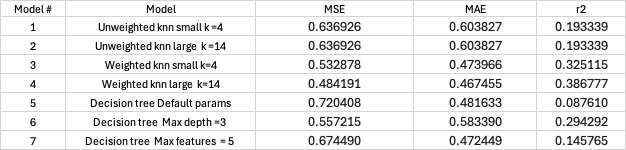

# **Part 2**

## Normalized, weighted k-Nearest Neighbors to find best K

In [24]:

# Creates new  StandardScaler object
scaler = StandardScaler()


scaler.fit(train_data) # compute the normalized values for predictors using training data

# Apply normalization
train_data_normalized = scaler.transform(train_data) # to train data
test_data_normalized = scaler.transform(test_data) # to test data




knn_weighted = KNeighborsRegressor(n_neighbors=4, weights='distance') # starting with small k and yes it is weighted

# train the model
knn_weighted.fit(train_data_normalized, train_sln)

# and predict on test data
pred_knn_weighted = knn_weighted.predict(test_data_normalized)



#performnce
mse = mean_squared_error(test_sln, pred_knn_weighted)
mae = mean_absolute_error(test_sln, pred_knn_weighted)
r2 = r2_score(test_sln, pred_knn_weighted)

print("Weighted kNN with k=4 (Normalized Data)")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)



Weighted kNN with k=4 (Normalized Data)
MSE: 0.40794369573898887
MAE: 0.39574726373548424
R2: 0.48334319019020455


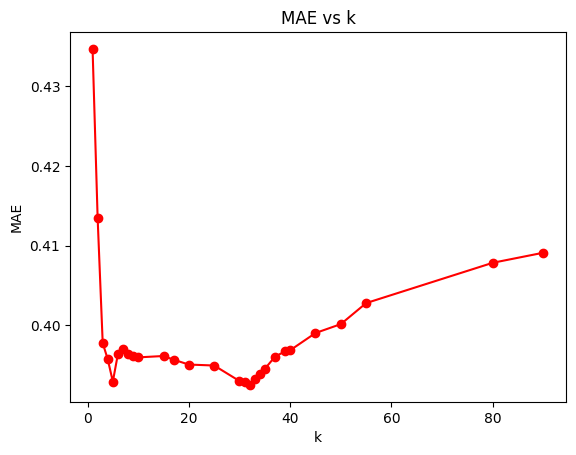

In [25]:
# plot them out


k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,15,17,20,25,30,31,32,33,34,35,37,39,40,45,50,55,80,90]
mae_values = []

for k in k_values:
    knn_weighted = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_weighted.fit(train_data_normalized, train_sln)
    pred_knn_weighted = knn_weighted.predict(test_data_normalized)
    mae = mean_absolute_error(test_sln, pred_knn_weighted)
    mae_values.append(mae)


#plot mae vs k

plt.plot(k_values, mae_values,marker = 'o', color = 'red')
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('MAE vs k')
plt.show()

In [26]:
for k , mae in zip(k_values, mae_values):
    print(f"k = {k}, MAE = {mae}")

k = 1, MAE = 0.4346938775510204
k = 2, MAE = 0.4134618772916808
k = 3, MAE = 0.39779567109310404
k = 4, MAE = 0.39574726373548424
k = 5, MAE = 0.39295667439188564
k = 6, MAE = 0.3964134817990801
k = 7, MAE = 0.3970649482455148
k = 8, MAE = 0.3964084785462233
k = 9, MAE = 0.3961518161703897
k = 10, MAE = 0.395998088456296
k = 15, MAE = 0.39617278445559023
k = 17, MAE = 0.39570817223778304
k = 20, MAE = 0.3950984267888289
k = 25, MAE = 0.3949778230125071
k = 30, MAE = 0.3930303747684321
k = 31, MAE = 0.3928956988897199
k = 32, MAE = 0.39254377916414035
k = 33, MAE = 0.39333427193105264
k = 34, MAE = 0.39389631791459695
k = 35, MAE = 0.3945610896778696
k = 37, MAE = 0.39608388621073476
k = 39, MAE = 0.39676084779485477
k = 40, MAE = 0.39689244771364734
k = 45, MAE = 0.3990546121573406
k = 50, MAE = 0.4001717716349439
k = 55, MAE = 0.4028104962878688
k = 80, MAE = 0.4078669847184295
k = 90, MAE = 0.40913075174049757


From the graph , there is close call for two values . One is k = 5 , and another around 30.
After printing MAE with k , we can conclude that the best k is k = 32, with  MAE = 0.39254377916414035.   

```
k = 5, with MAE = 0.39295667439188564 is not that bad choice either.
```



LEts give a shot for MSE

In [27]:
k_values = [1,2,3,4,5,6,7,8,9,10,15,19,27,29,30,31,32,33,34,35,36,40,48,60]
mse_values = []

for k in k_values:
    knn_weighted = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_weighted.fit(train_data_normalized, train_sln)
    pred_knn_weighted = knn_weighted.predict(test_data_normalized)
    mse = mean_squared_error(test_sln, pred_knn_weighted)
    mse_values.append(mse)

df_mse = pd.DataFrame({'k': k_values, 'MSE': mse_values})
print(df_mse)

     k       MSE
0    1  0.600000
1    2  0.494432
2    3  0.431068
3    4  0.407944
4    5  0.387908
5    6  0.383367
6    7  0.376652
7    8  0.372208
8    9  0.369380
9   10  0.370288
10  15  0.364525
11  19  0.362258
12  27  0.360092
13  29  0.359457
14  30  0.359109
15  31  0.359235
16  32  0.359085
17  33  0.360299
18  34  0.361663
19  35  0.362481
20  36  0.364485
21  40  0.365645
22  48  0.367834
23  60  0.372856


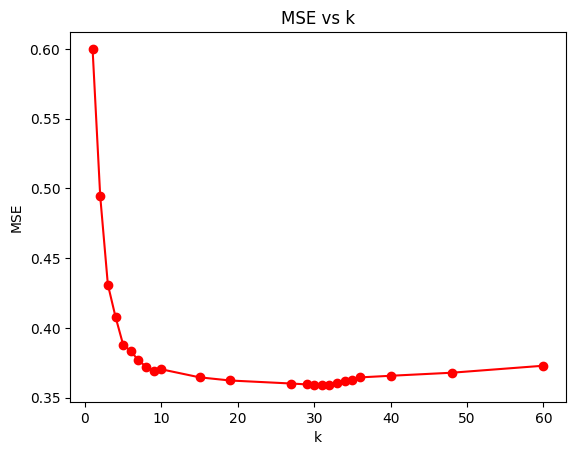

In [28]:
# plot mse vs k
plt.plot(k_values, mse_values,marker = 'o', color = 'red')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE vs k')
plt.show()

From MSE , i happen to find that optimal K is 32.   

```
for k =32  , mse= 0.359085 lowest
```



# Part 3

## 1. What effect did using a large k vs. a small k have on your results?
### (When Not Normalised ) When I used unweighted, small k and large k value threw me same result, somehow, not sure if I made a mistake or something. But for weighted , larger K value gave me better results.  

### .

## 2. Which algorithm performed better overall: kNN or Decision Trees? Why do you think that was the case?

### For this, I would say  ,the kNN models performed better overall than the Decision Trees.The weighted kNN with larger k (k = 14) gave the best results, with the lowest error and highest R2. This might be because , kNN makes predictions on patterns from nearby samples (distance), and as we took weighted , the performance got even better. And also i normalised the data , that threw even better result. Where on other hand, decision tree does not care about scale and it might have overfitted.

### .
## 3. What effect did normalizing the data have on your results? Why might normalization influence performance?

### As also mentioned in Qn 2 , Normalizing the data improved the results, especially for the kNN models. By normalizing, all features are brought to the same scale, allowing the model to treat them equally and measure distances more accurately. This lead to smoother and more balanced predictions. But for Decision Trees, normalization did not make much difference because they split data based on feature thresholds, not distances, so feature scale does not affect their performance.




#4. Do something original with the dataset. Ask a new question, run an experiment, and explain your reasoning and results. Creativity and thoughtful analysis are encouraged.

In [29]:
# i wonder if i can tune decision tree further to get better results


dt_tuned = DecisionTreeRegressor(random_state=41, max_depth=3, max_leaf_nodes=10)
dt_tuned.fit(train_data, train_sln)
pred_dt_tuned = dt_tuned.predict(test_data)

# performance

mae = mean_absolute_error(test_sln, pred_dt_tuned)
mse = mean_squared_error(test_sln, pred_dt_tuned)
r2 = r2_score(test_sln, pred_dt_tuned)

print("Decision Tree with tuned parameters, max_depth = 3, max_leaf_nodes=10")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

Decision Tree with tuned parameters, max_depth = 3, max_leaf_nodes=10
MSE: 0.5572152024304846
MAE: 0.583390280934992
R2: 0.29429224701280554


Lets get all models with tuning , all at once

In [30]:
tuned_models = {
    "max_depth=3": DecisionTreeRegressor(random_state=41, max_depth=3),
    "max_depth=5": DecisionTreeRegressor(random_state=41, max_depth=5),
    "max_depth=8": DecisionTreeRegressor(random_state=41, max_depth=8),
    "max_leaf_nodes=10": DecisionTreeRegressor(random_state=41, max_leaf_nodes=10),
    "max_leaf_nodes=20": DecisionTreeRegressor(random_state=41, max_leaf_nodes=20),
    "min_samples_split=10": DecisionTreeRegressor(random_state=41, min_samples_split=10),
    "min_samples_split=20": DecisionTreeRegressor(random_state=41, min_samples_split=20),
    "min_samples_leaf=5": DecisionTreeRegressor(random_state=41, min_samples_leaf=5),
    "min_samples_leaf=10": DecisionTreeRegressor(random_state=41, min_samples_leaf=10),
    "max_depth=5_min_samples_leaf=5": DecisionTreeRegressor(random_state=41, max_depth=5, min_samples_leaf=5),
    "min_samples_leaf=5": DecisionTreeRegressor(random_state=41, min_samples_leaf=5),
    "min_samples_leaf=10": DecisionTreeRegressor(random_state=41, min_samples_leaf=10),
    "max_depth=5_min_samples_leaf=5": DecisionTreeRegressor(random_state=41, max_depth=5, min_samples_leaf=5),
    "max_depth=7_min_samples_leaf=3": DecisionTreeRegressor(random_state=41, max_depth=7, min_samples_leaf=3),
    "max_depth=10_min_samples_split=5": DecisionTreeRegressor(random_state=41, max_depth=10, min_samples_split=5),
    "max_depth=4_min_samples_split=15": DecisionTreeRegressor(random_state=41, max_depth=4, min_samples_split=15),
    "max_leaf_nodes=15_min_samples_split=10": DecisionTreeRegressor(random_state=41, max_leaf_nodes=15, min_samples_split=10),
    "max_leaf_nodes=25_min_samples_leaf=4": DecisionTreeRegressor(random_state=41, max_leaf_nodes=25, min_samples_leaf=4),
    "max_depth=6_min_samples_leaf=6": DecisionTreeRegressor(random_state=41, max_depth=6, min_samples_leaf=6),
    "max_depth=8_min_samples_split=8": DecisionTreeRegressor(random_state=41, max_depth=8, min_samples_split=8),
    "max_depth=3_min_samples_split=5": DecisionTreeRegressor(random_state=41, max_depth=3, min_samples_split=5),
    "max_leaf_nodes=30_min_samples_leaf=2": DecisionTreeRegressor(random_state=41, max_leaf_nodes=30, min_samples_leaf=2),
    "max_depth=9_min_samples_leaf=3": DecisionTreeRegressor(random_state=41, max_depth=9, min_samples_leaf=3),

}

# performance for  each model
for name, model in tuned_models.items():
    model.fit(train_data, train_sln)
    preds = model.predict(test_data)

    mae = mean_absolute_error(test_sln, preds)
    mse = mean_squared_error(test_sln, preds)
    r2 = r2_score(test_sln, preds)

    print(f"\nDecision Tree ({name})")
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)



Decision Tree (max_depth=3)
MSE: 0.5572152024304846
MAE: 0.583390280934992
R2: 0.29429224701280554

Decision Tree (max_depth=5)
MSE: 0.5320905643377992
MAE: 0.5697512126717449
R2: 0.32611236214187456

Decision Tree (max_depth=8)
MSE: 0.5461404463235142
MAE: 0.542219473902027
R2: 0.30831832026608563

Decision Tree (max_leaf_nodes=10)
MSE: 0.5487002190537127
MAE: 0.5903716780749049
R2: 0.3050763924548795

Decision Tree (max_leaf_nodes=20)
MSE: 0.5474084555474792
MAE: 0.5878930776228504
R2: 0.3067123986467397

Decision Tree (min_samples_split=10)
MSE: 0.6564206169240183
MAE: 0.5273890508584387
R2: 0.1686495333161543

Decision Tree (min_samples_split=20)
MSE: 0.599841633385595
MAE: 0.555159329777269
R2: 0.24030627772125956

Decision Tree (min_samples_leaf=5)
MSE: 0.603836489811344
MAE: 0.5442816650469712
R2: 0.23524683006185465

Decision Tree (min_samples_leaf=10)
MSE: 0.5143020252198868
MAE: 0.5323385675755835
R2: 0.34864137770905645

Decision Tree (max_depth=5_min_samples_leaf=5)
MSE: 0

## I started wondering, does increasing the tree's complexity (like depth or number of leaf nodes) always lead to better predictions? Or is there a point where the model becomes “too specific” and starts to overfit the data?


### To test this, I compared the Decision Tree models with different levels of complexity starting from a shallow tree (max_depth=3) to a very deep one (max_depth=10), and also varied the number of leaf nodes and minimum samples per leaf.Then, I looked at(printed) how the MSE, MAE, and R2 changed with these settings.

### From my result, i  noticed that the models with moderate depth (around 5 to 8) gave the best performance. But when I made the tree deeper (max_depth=9 or 10), performance did not improve, and sometimes got worse.

## Conclusion:

### So my experiment shows that a balanced Decision Tree (not too deep, neither  too shallow) works best for this dataset.Its like finding a sweet spot where the model is complex enough to capture relationships but simple enough to generalize well.